<a href="https://colab.research.google.com/github/poo5zan/realized-volatility/blob/dev/data-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
RUN_FROM_COLAB = True

In [7]:
if RUN_FROM_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')

    ROOT_DIR = '/content/drive/My Drive/Research Project/data/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# realized volatility data
import pandas as pd
import os

In [10]:
if RUN_FROM_COLAB:
    DATA_DIR = '/content/drive/My Drive/Research Project/datasets/'
else:
    DATA_DIR = '/Users/pujanmaharjan/uni adelaide/uofa_research_project/datasets'

def get_all_train_data():
    train = pd.read_csv(os.path.join(DATA_DIR, 'optiver-realized-volatility-prediction', 'train_time_id_ordered.csv'))
    return train

def get_unique_col_elements(df: pd.DataFrame, col_name: str):
    return list(df[col_name].unique())

In [12]:
df = get_all_train_data()
print('Total data ', df.shape)
df.head()

Total data  (428932, 4)


stock_id  time_id    target  time_id_order
0         8     4294  0.005047              0
1        47     4294  0.001244              0
2       105     4294  0.002353              0
3        69     4294  0.001616              0
4       111     4294  0.001917              0

In [13]:
stock_ids = get_unique_col_elements(df, 'stock_id')
print('Number of stock ids ', len(stock_ids))

Number of stock ids  112


In [14]:
time_ids = get_unique_col_elements(df, 'time_id')
print('Number of time ids ', len(time_ids))

Number of time ids  3830


In [20]:
stock_0 = df[df['stock_id'] == 0].reset_index(drop=True)
stock_0


stock_id  time_id    target  time_id_order
0            0     4294  0.003267              0
1            0    24033  0.002580              1
2            0     5666  0.002051              2
3            0    29740  0.002364              3
4            0    22178  0.001439              4
...        ...      ...       ...            ...
3825         0    24913  0.002402           3825
3826         0    32195  0.002311           3826
3827         0    15365  0.002017           3827
3828         0    10890  0.003475           3828
3829         0    29316  0.002846           3829

[3830 rows x 4 columns]

In [21]:
stock_1 = df[df['stock_id'] == 1].reset_index(drop=True)
stock_1

stock_id  time_id    target  time_id_order
0            1     4294  0.006736              0
1            1    24033  0.003553              1
2            1     5666  0.002267              2
3            1    29740  0.001642              3
4            1    22178  0.001667              4
...        ...      ...       ...            ...
3825         1    24913  0.005280           3825
3826         1    32195  0.005726           3826
3827         1    15365  0.005306           3827
3828         1    10890  0.005982           3828
3829         1    29316  0.004365           3829

[3830 rows x 4 columns]

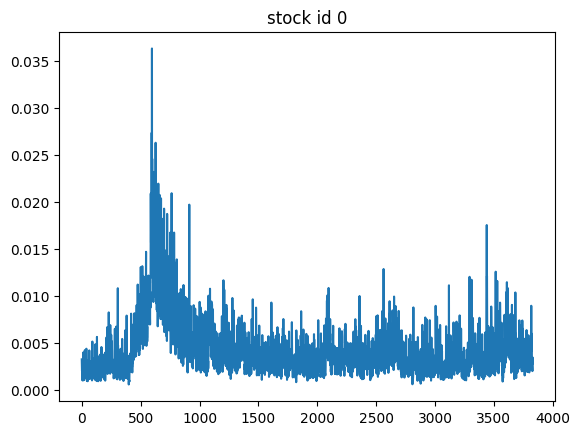

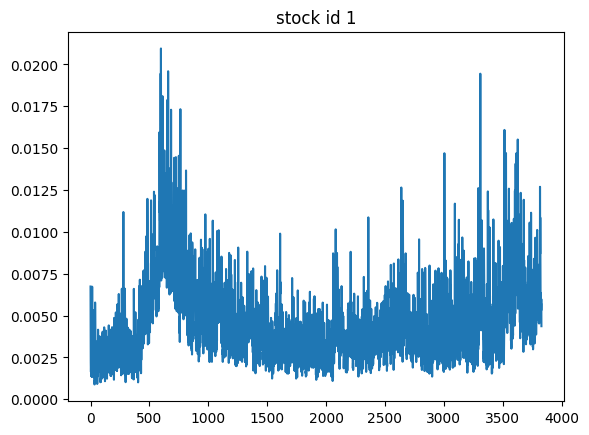

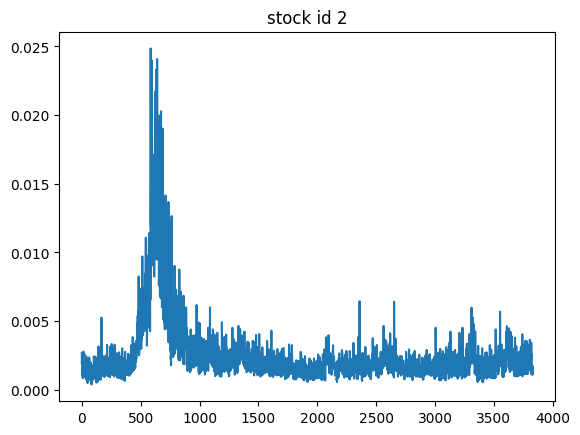

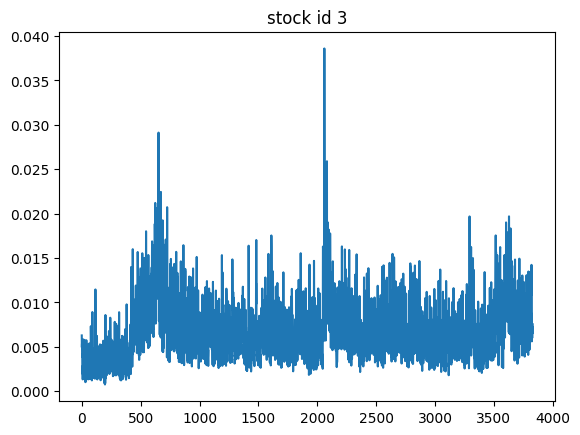

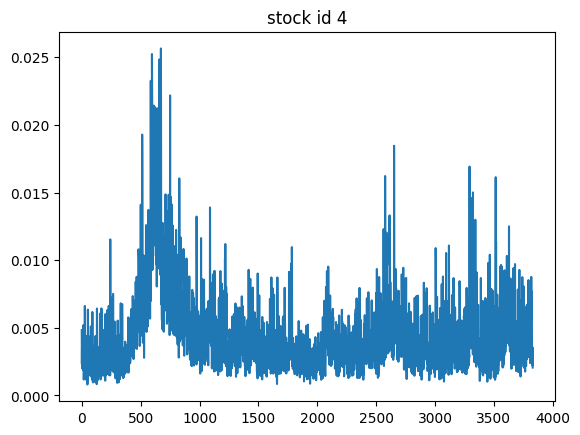

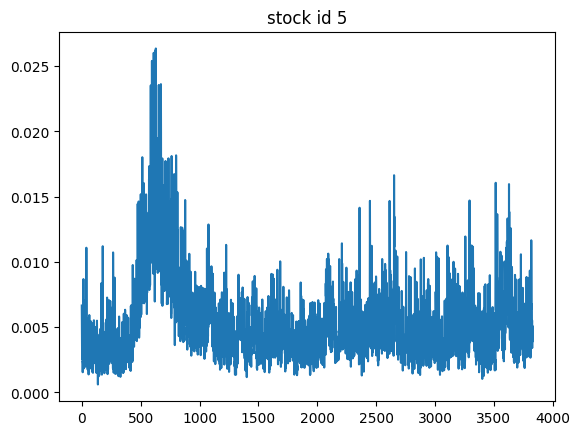

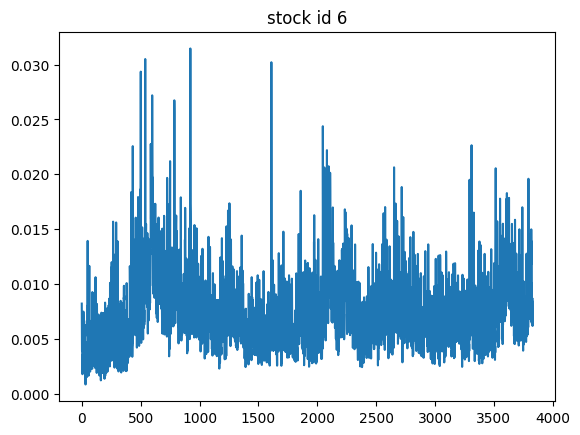

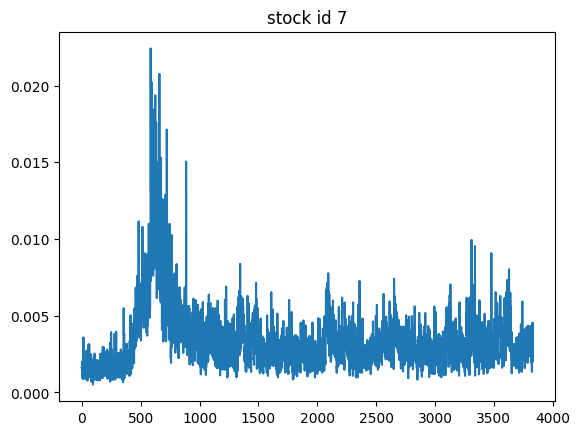

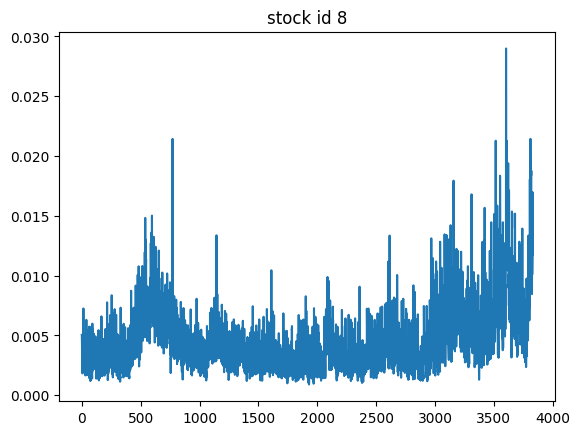

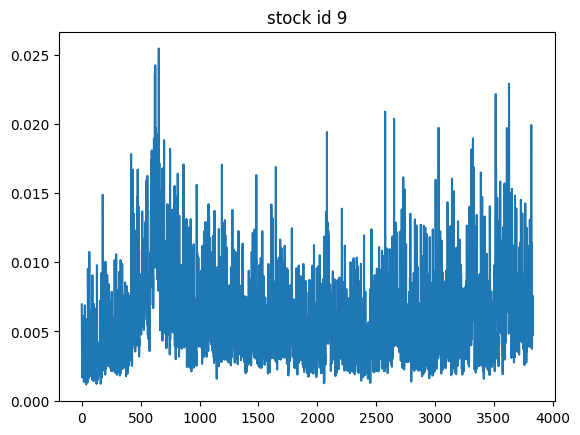

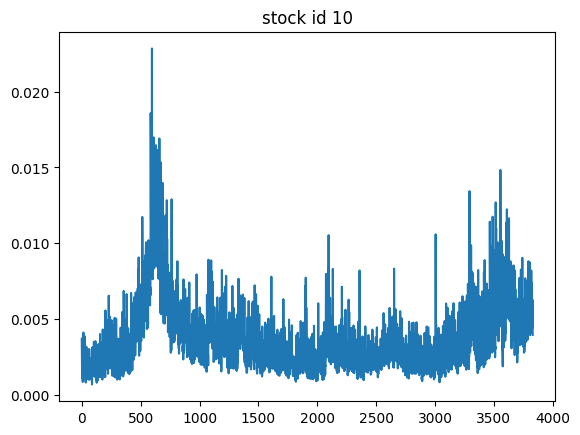

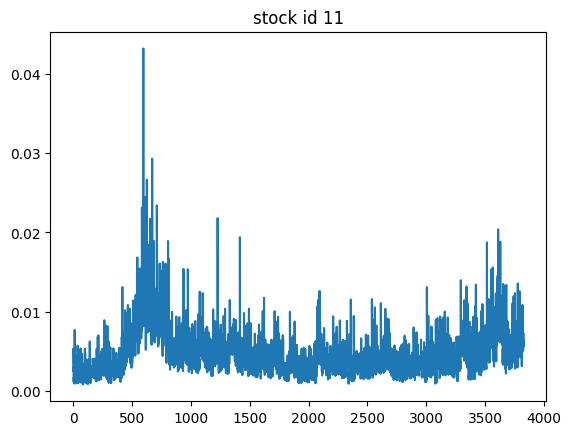

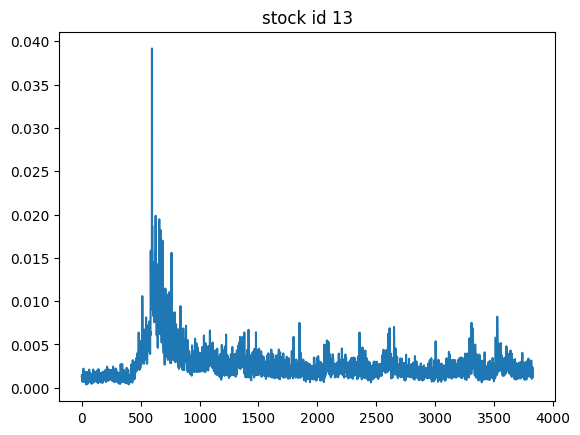

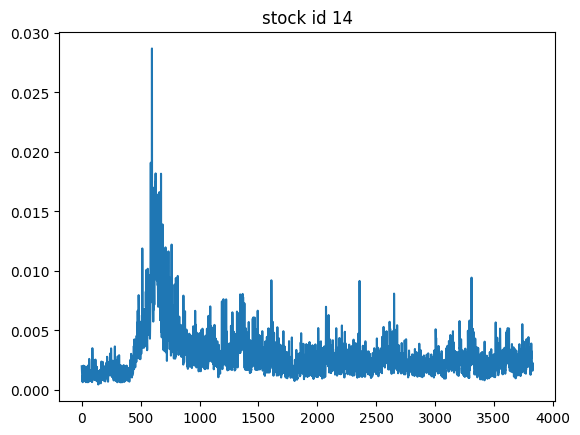

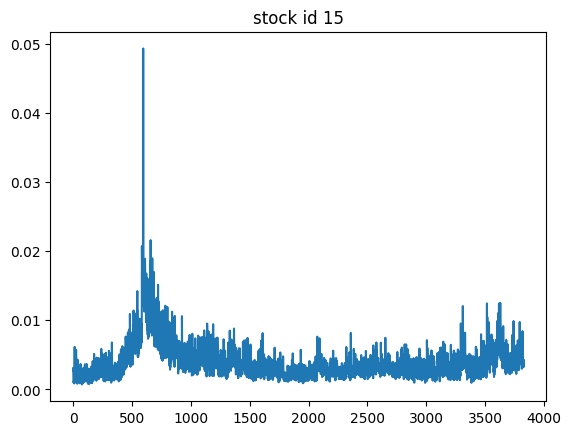

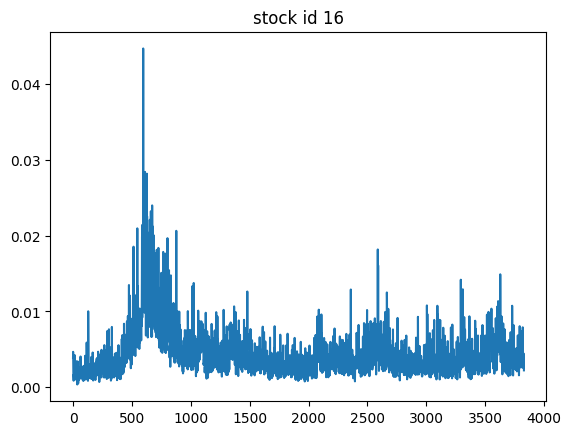

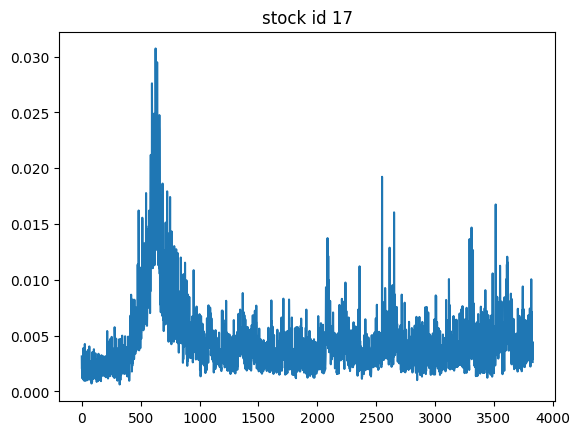

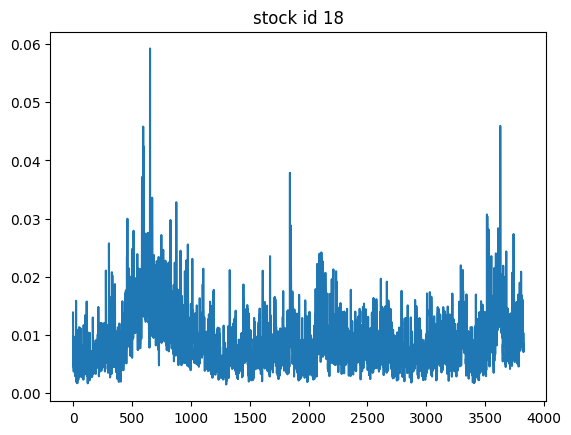

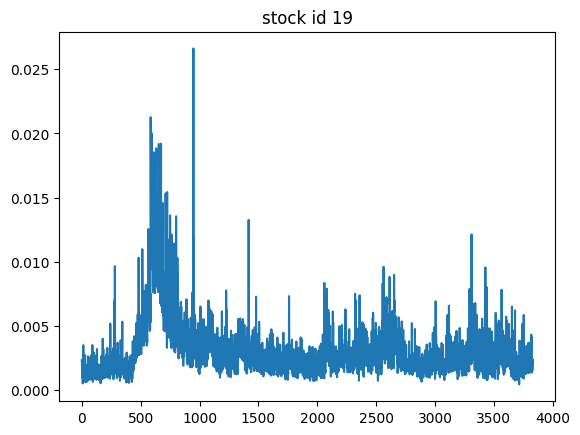

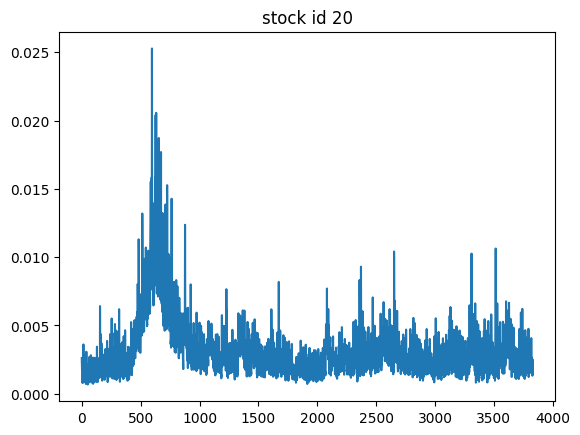

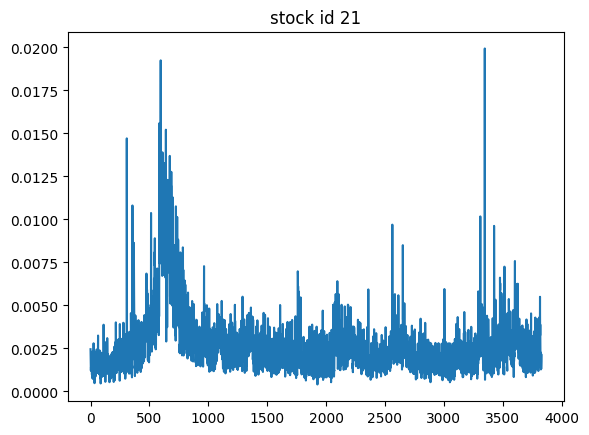

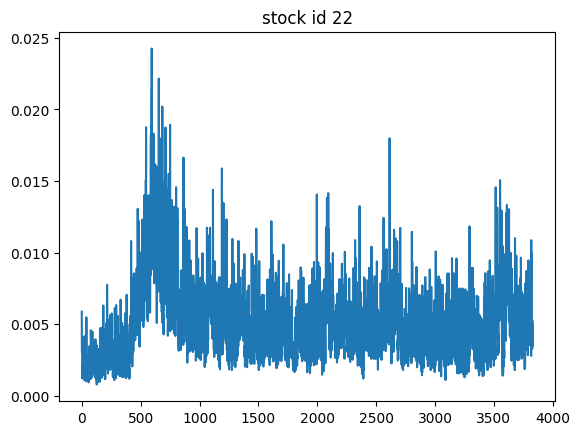

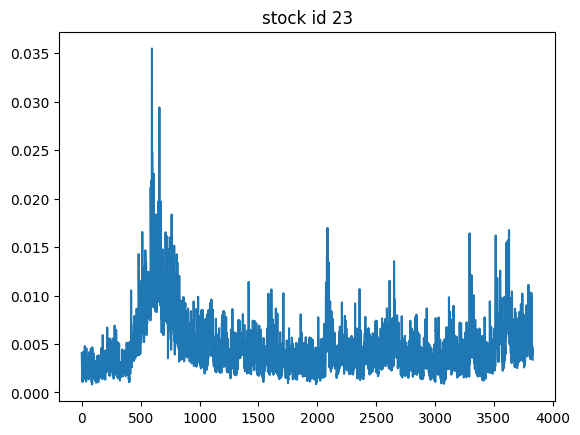

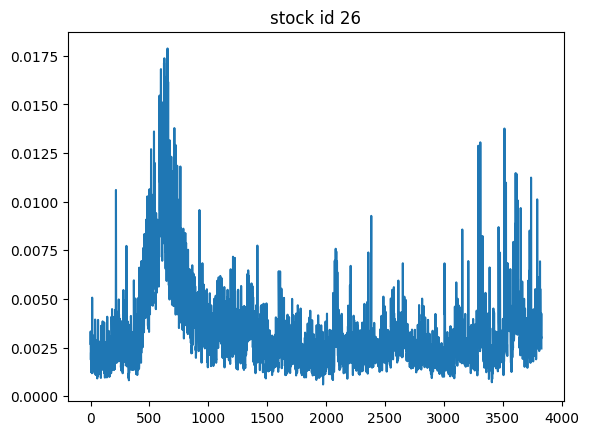

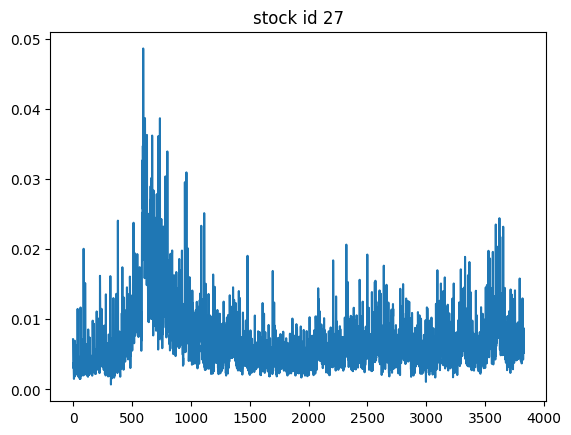

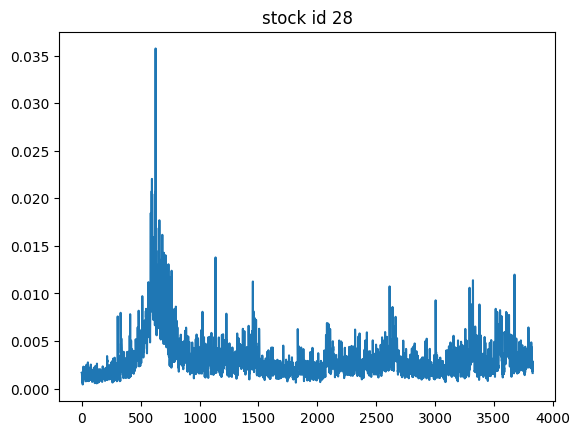

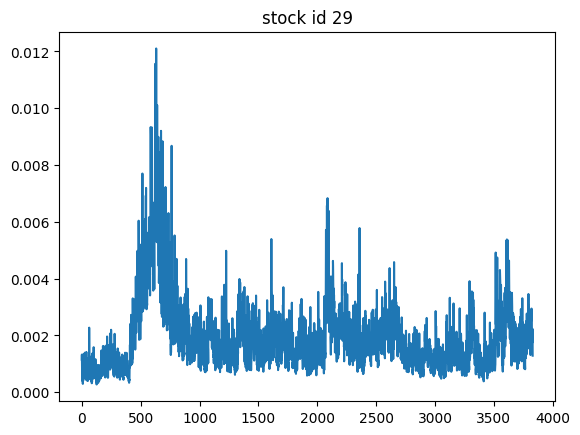

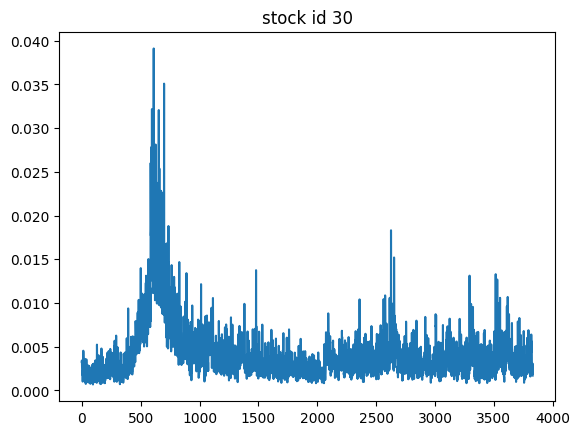

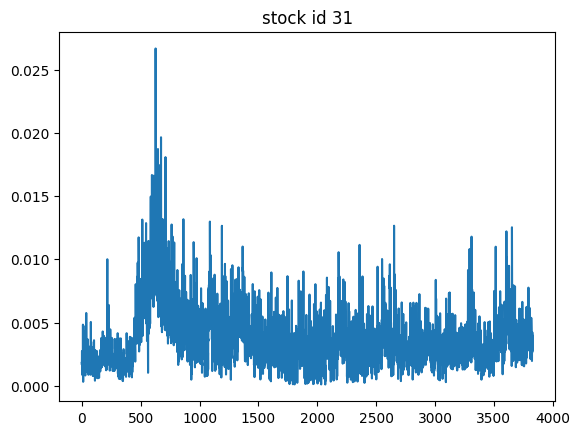

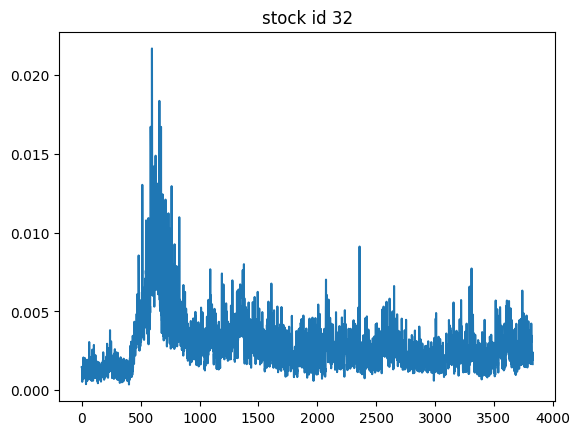

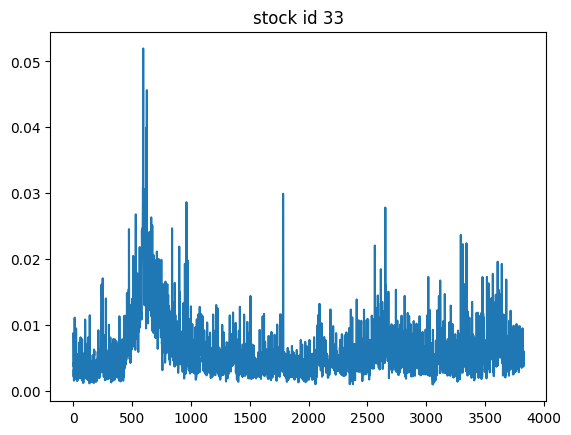

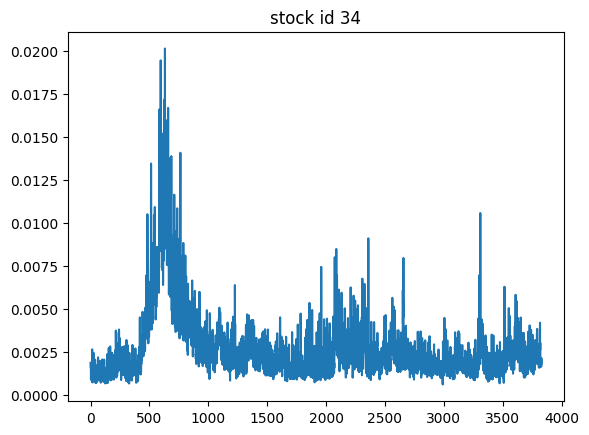

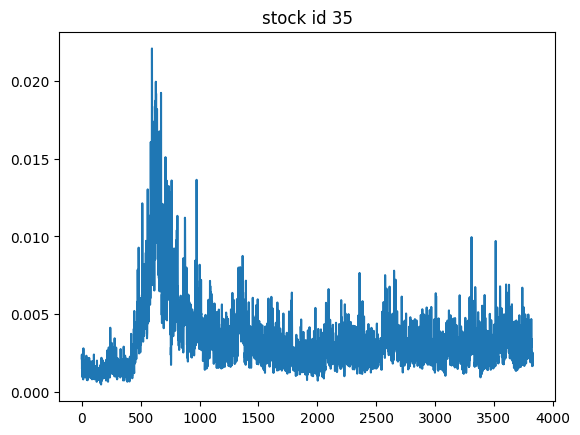

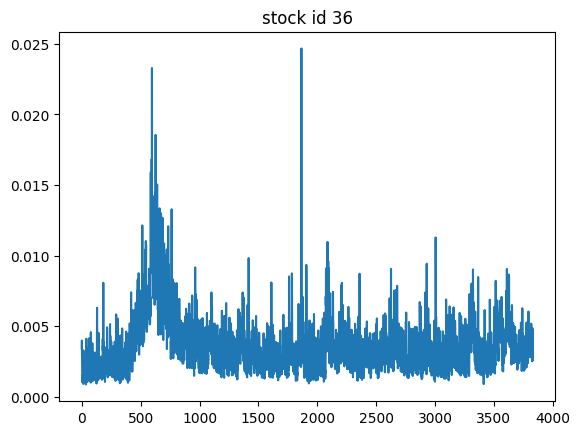

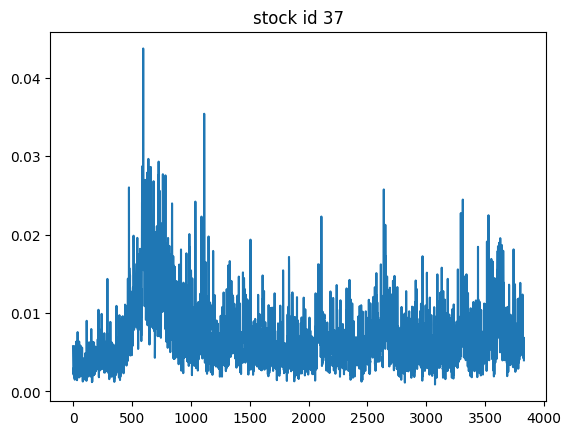

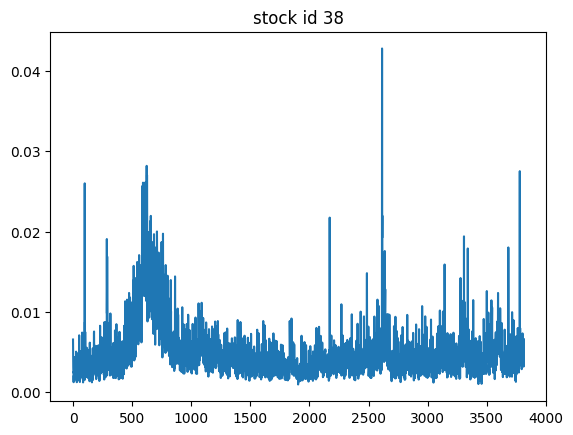

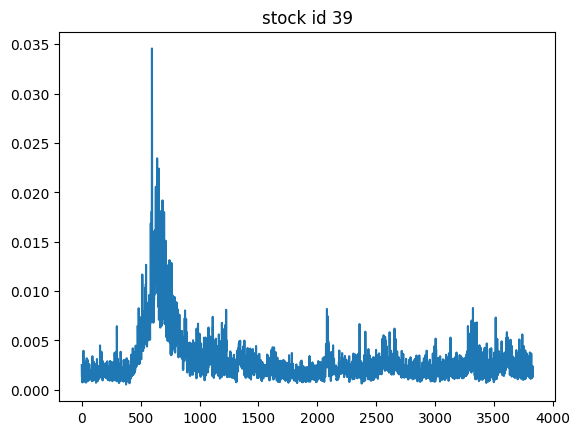

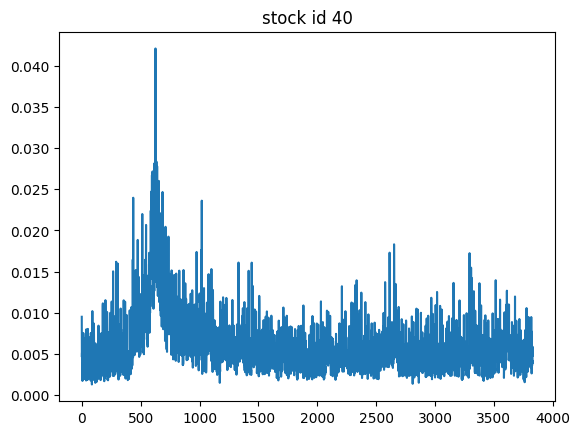

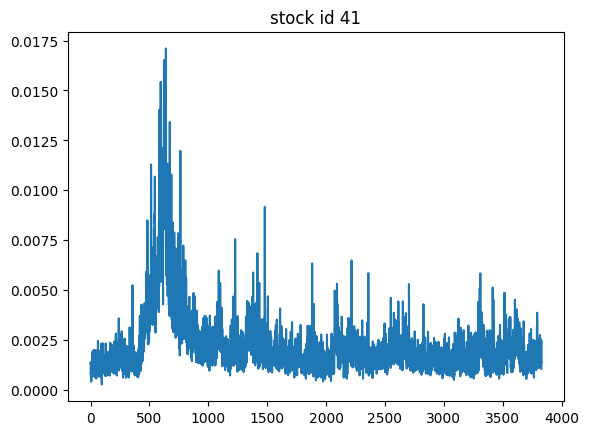

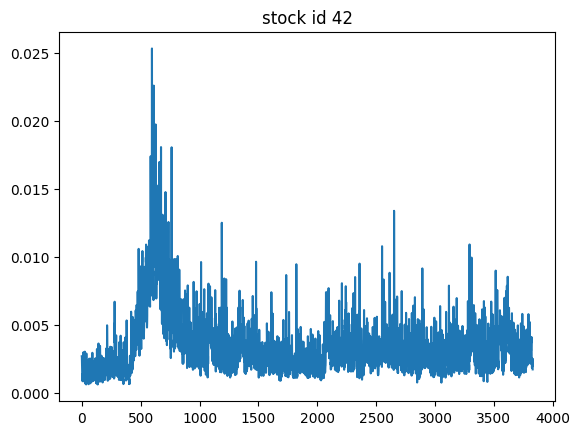

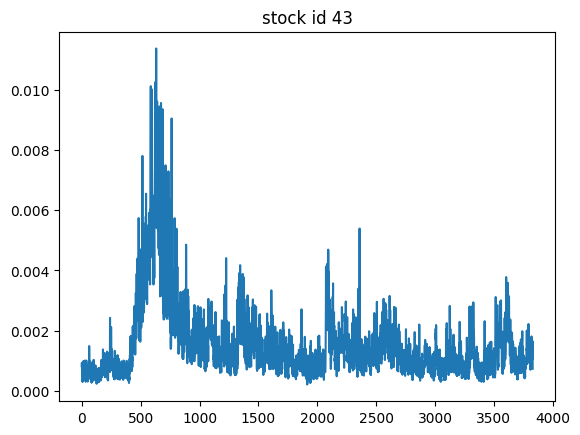

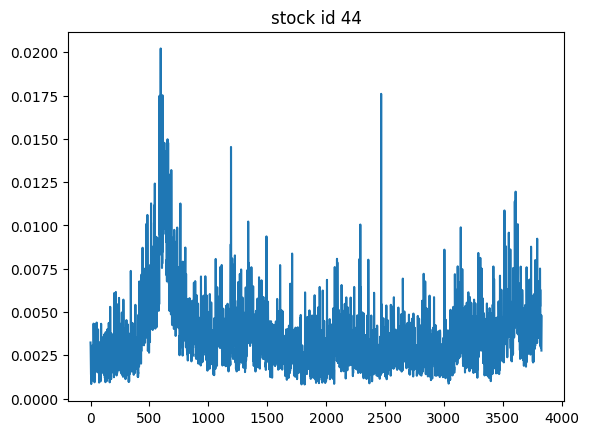

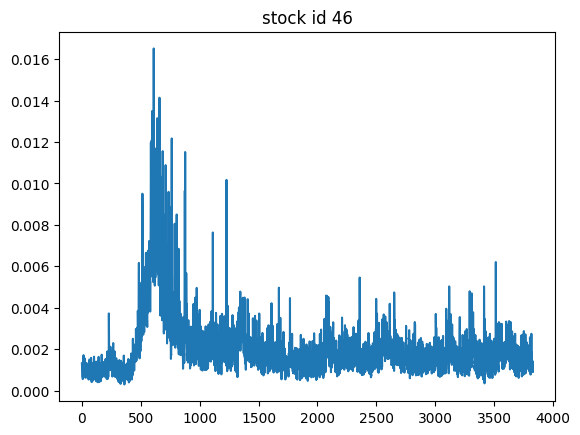

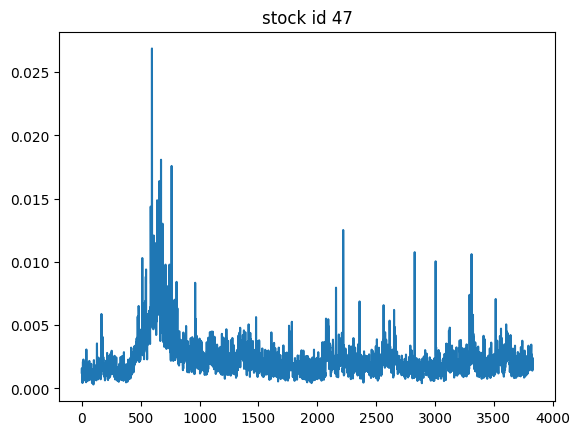

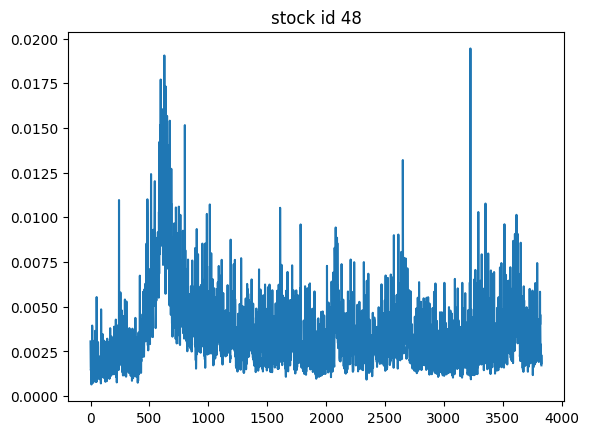

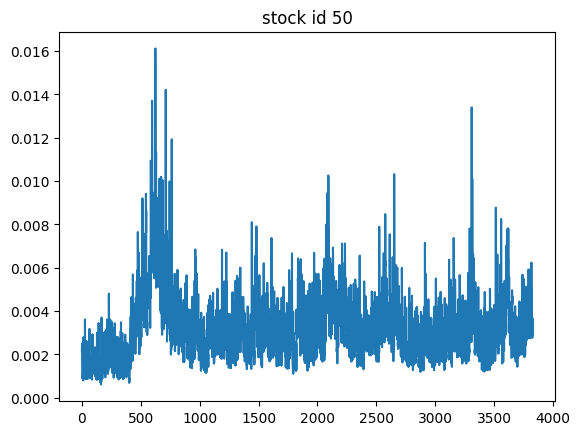

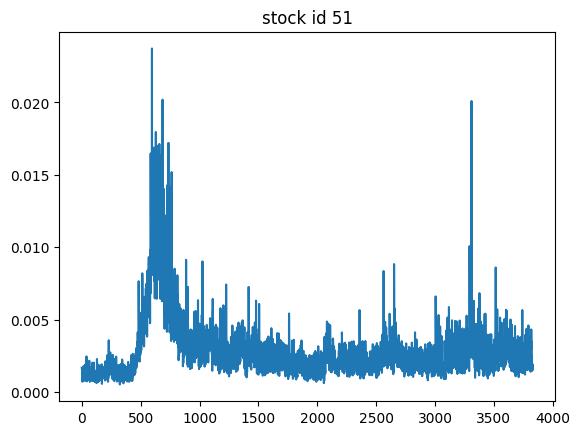

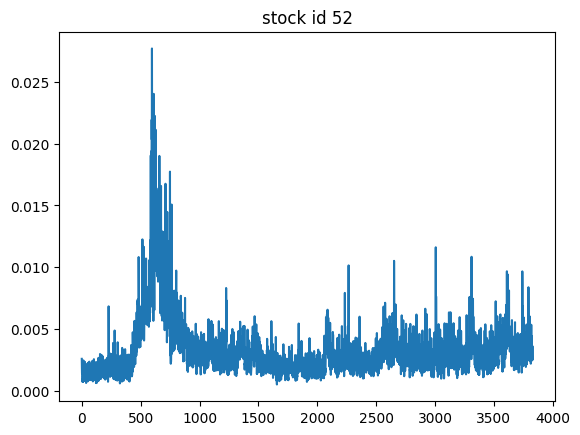

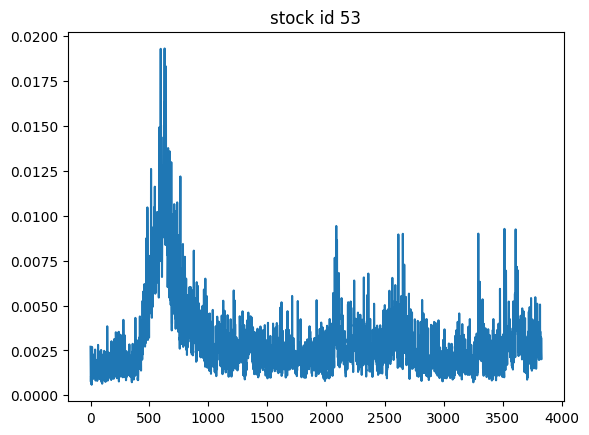

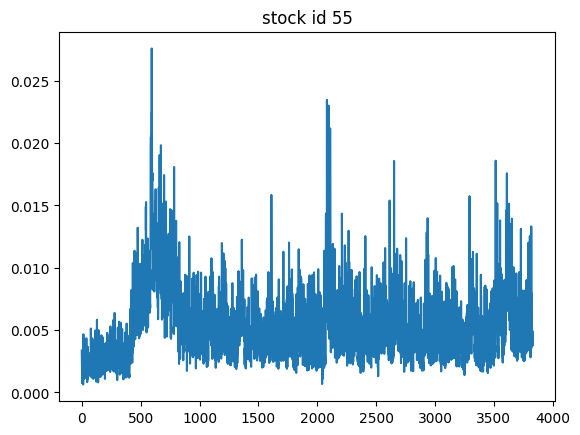

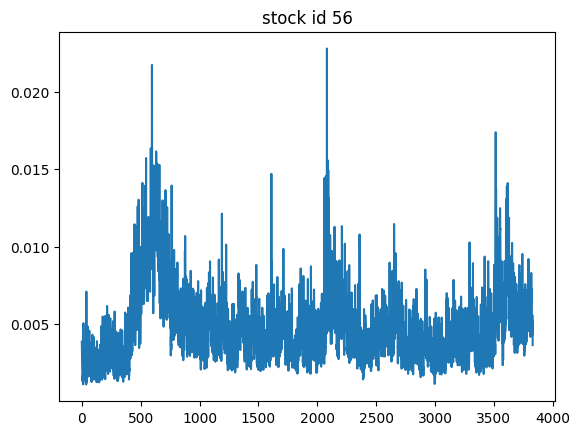

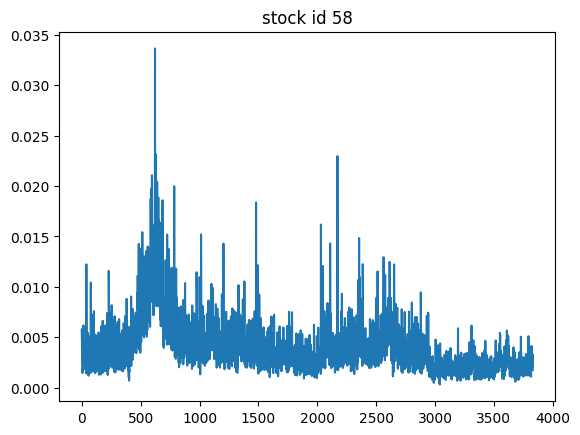

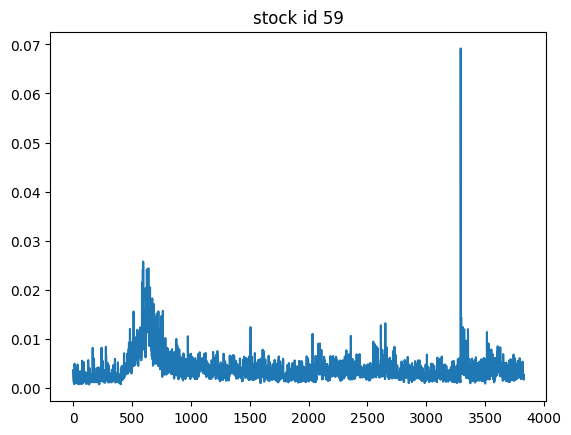

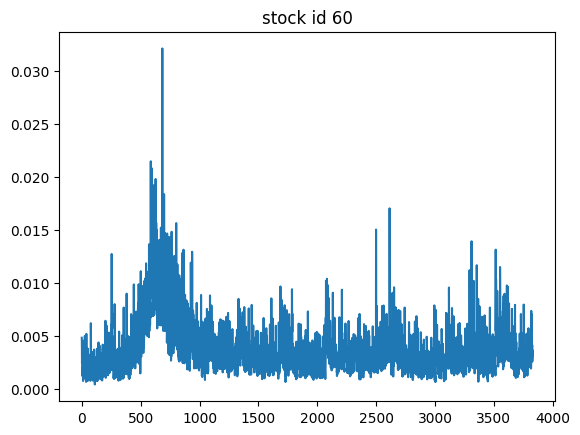

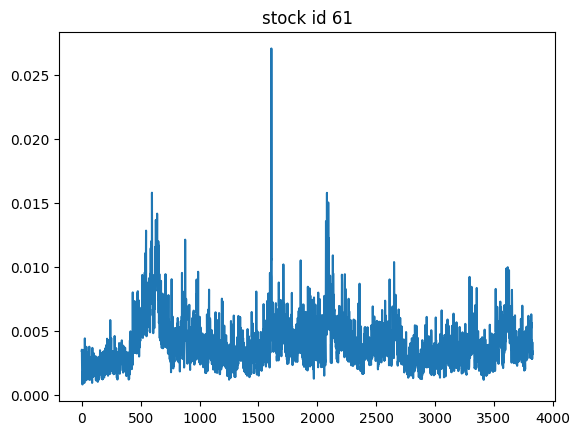

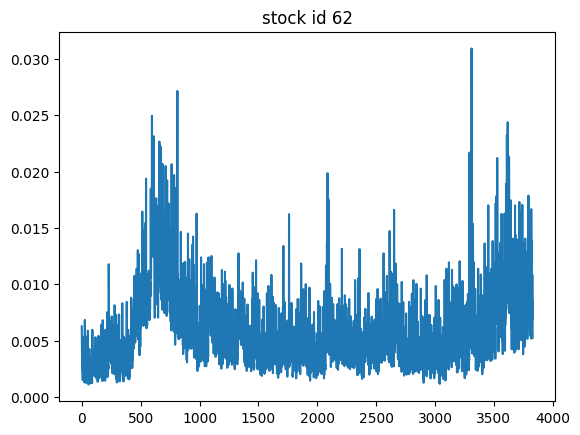

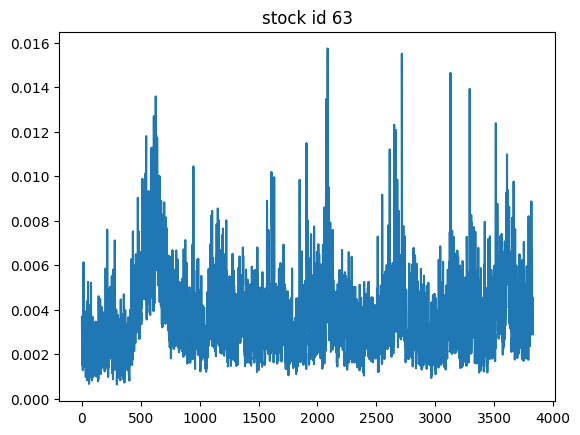

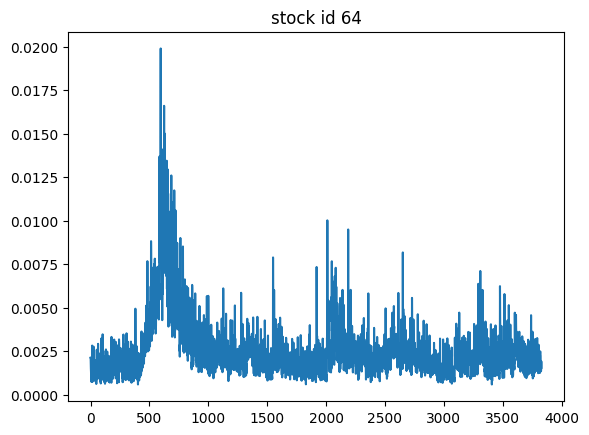

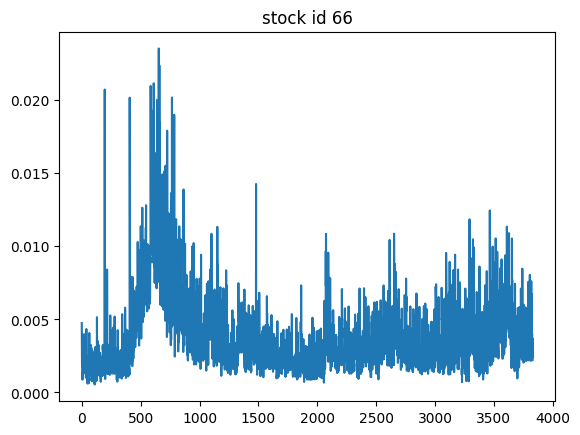

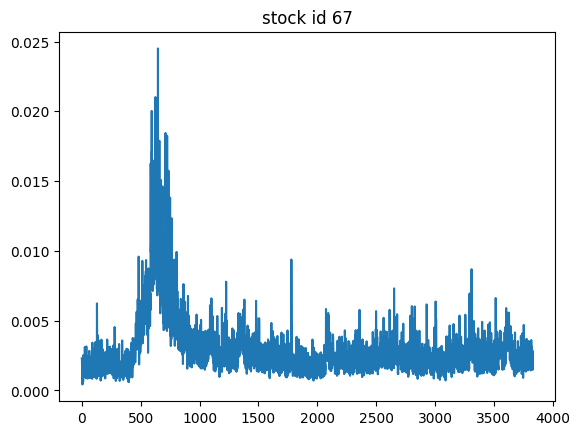

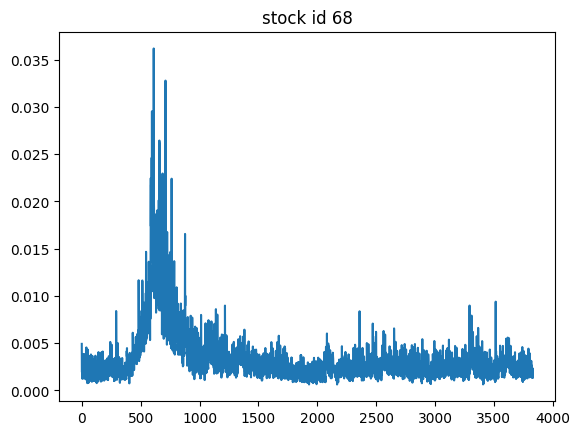

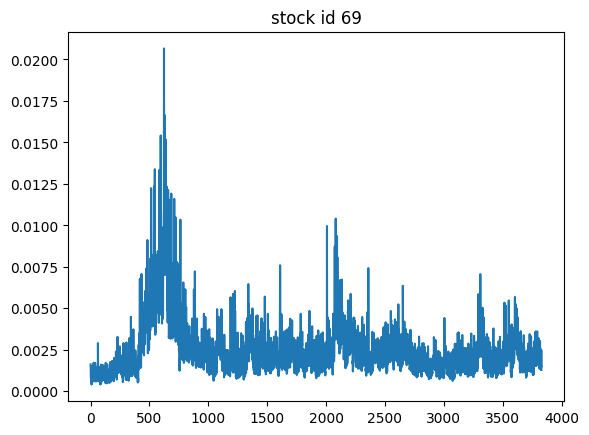

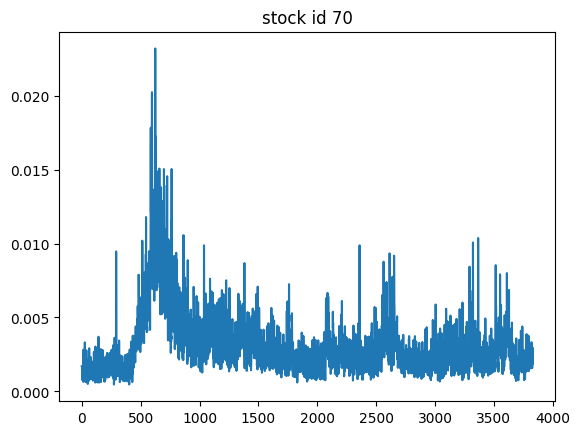

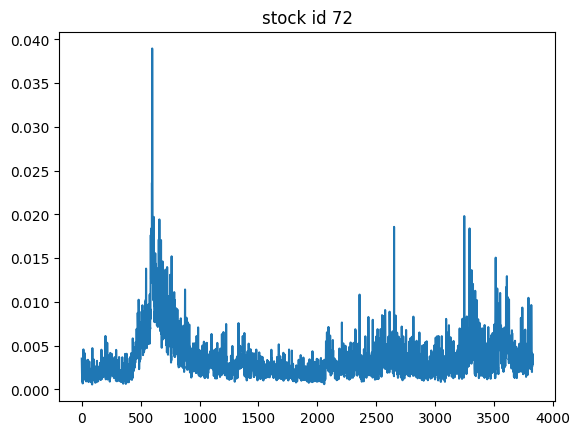

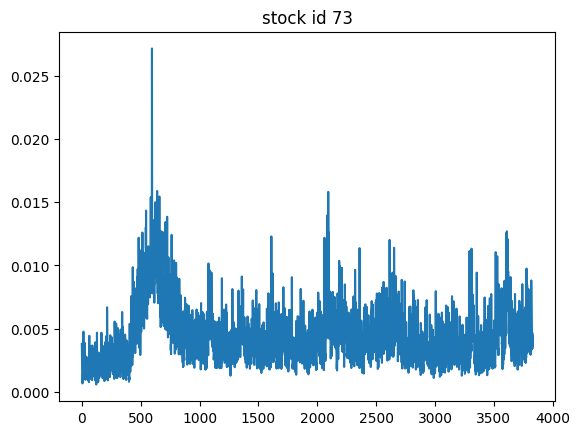

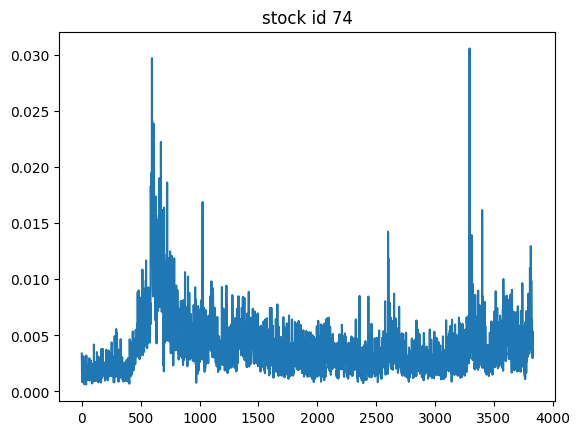

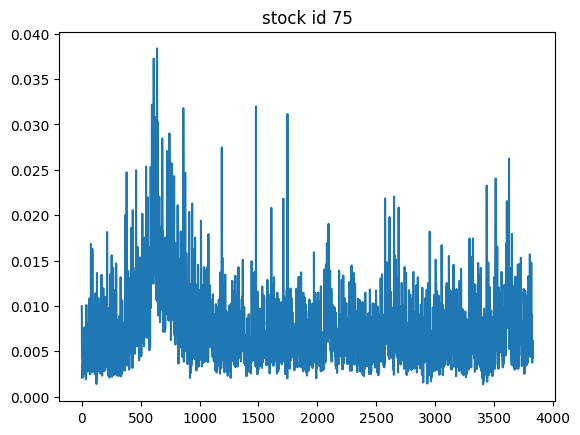

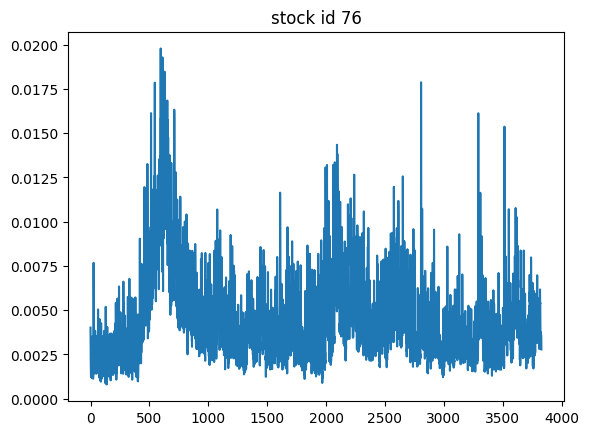

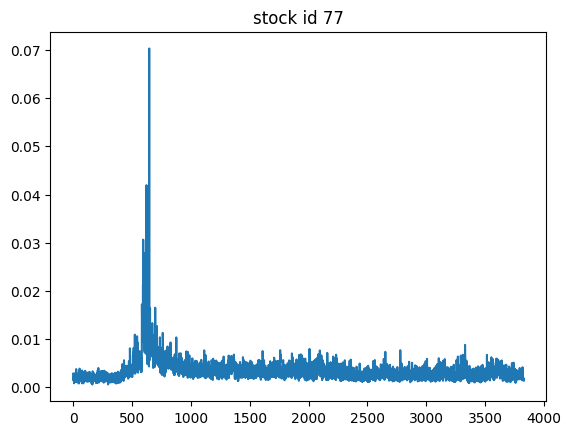

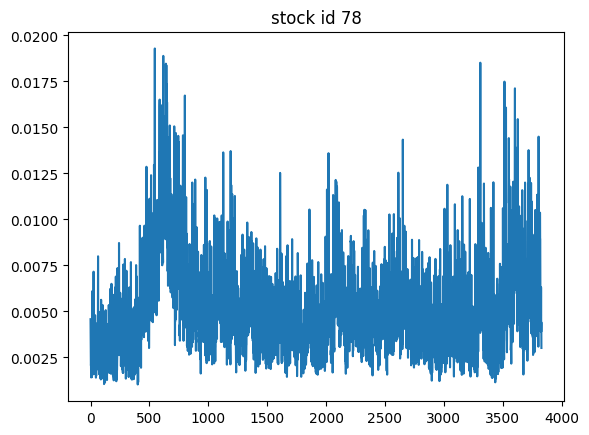

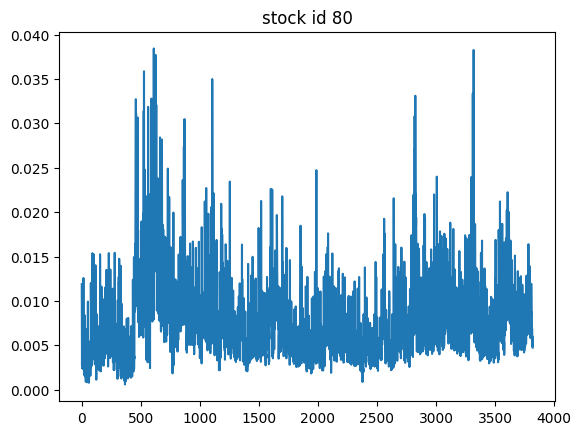

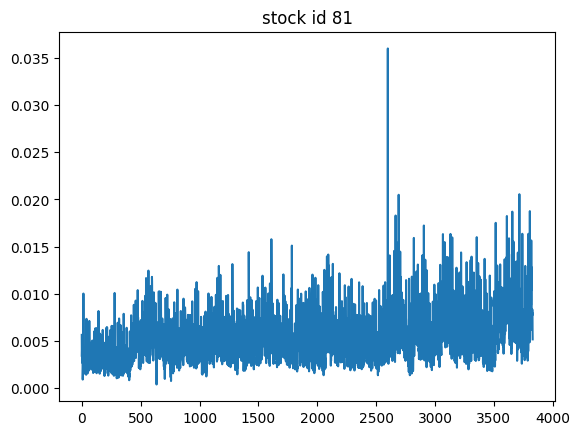

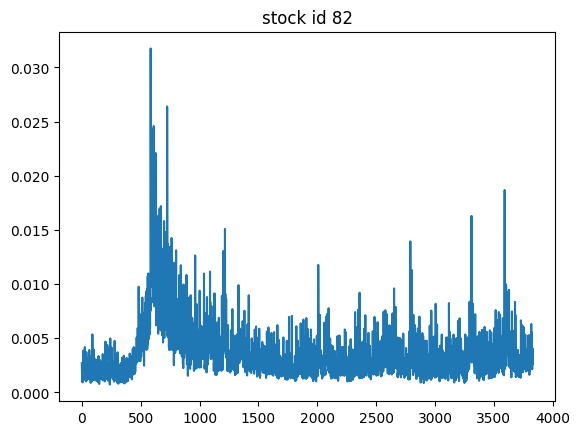

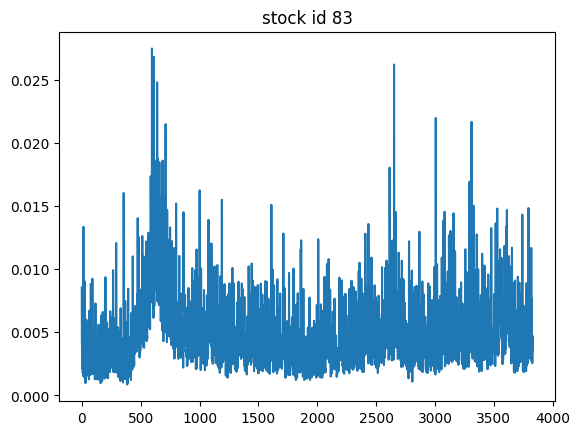

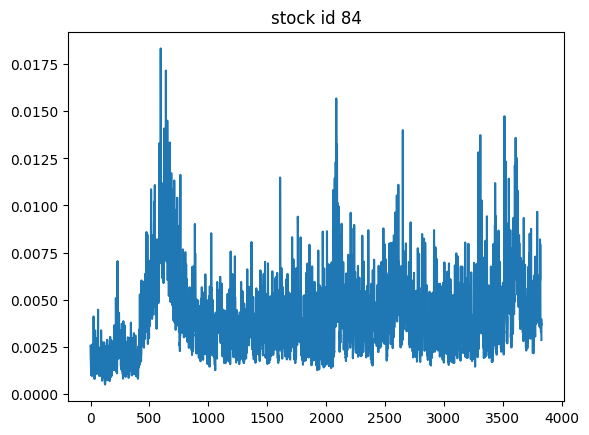

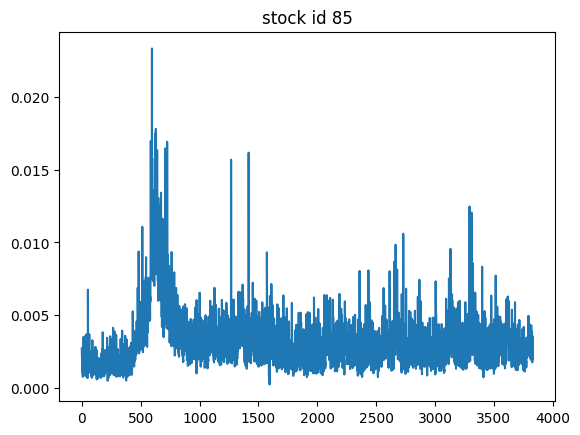

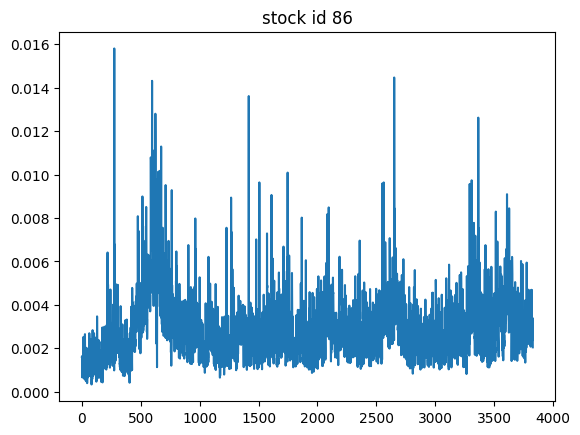

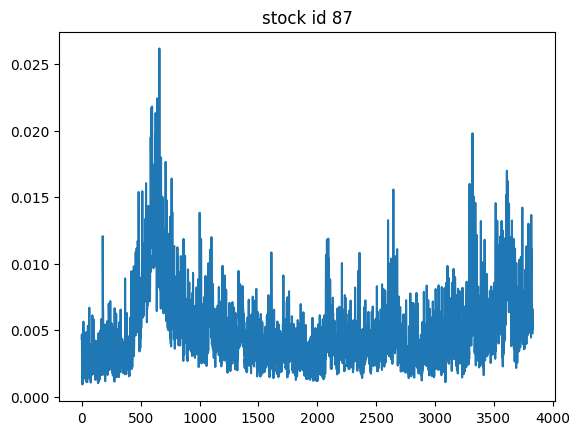

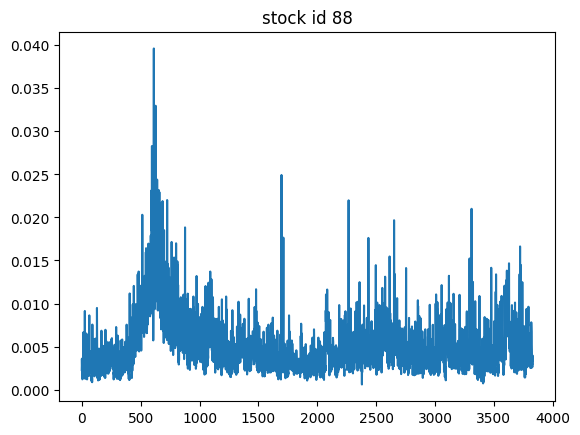

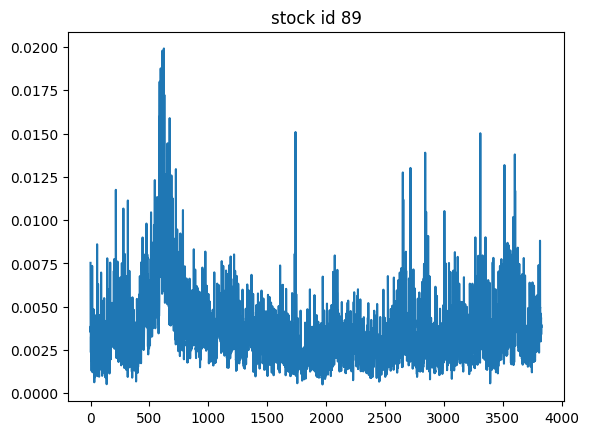

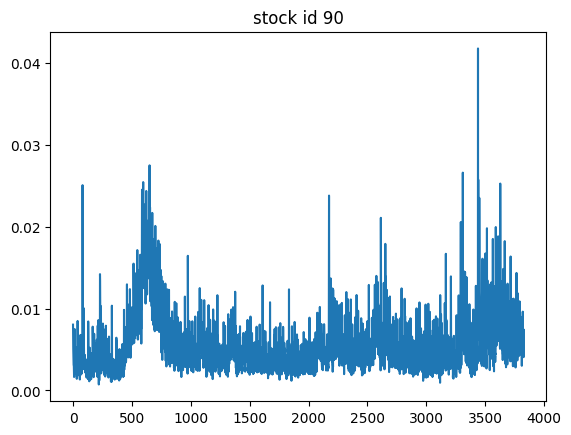

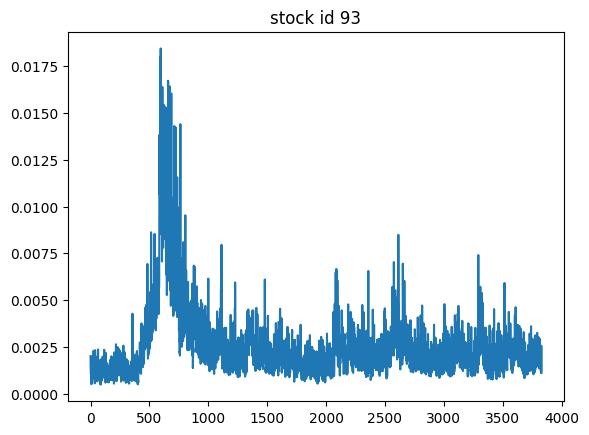

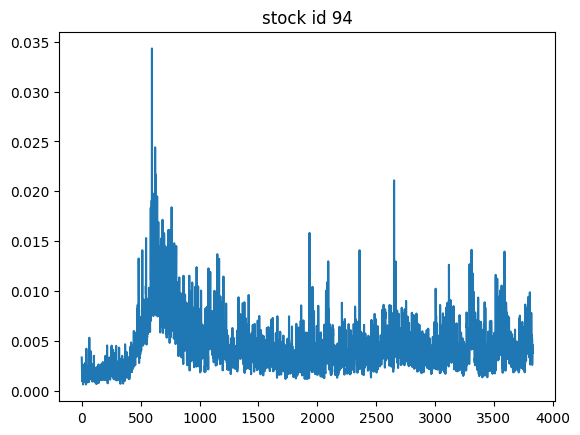

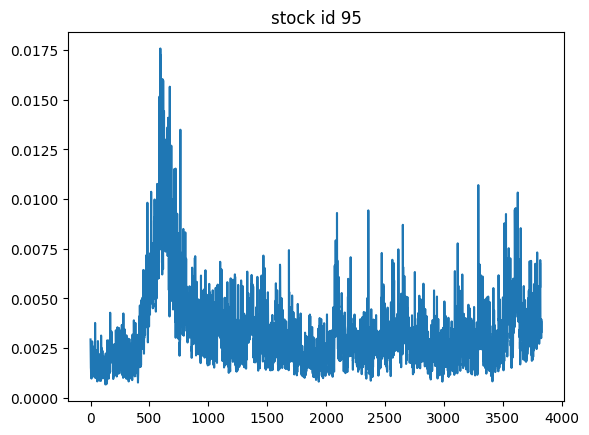

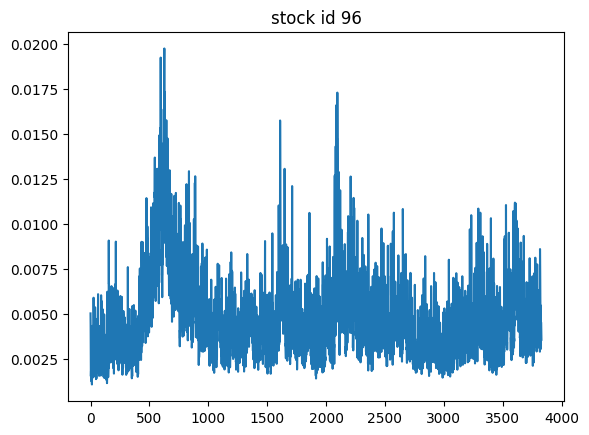

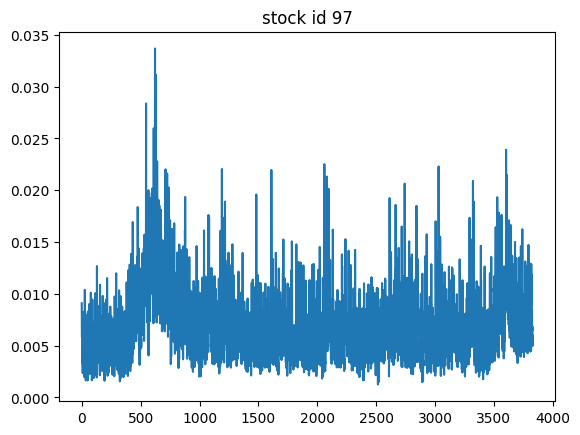

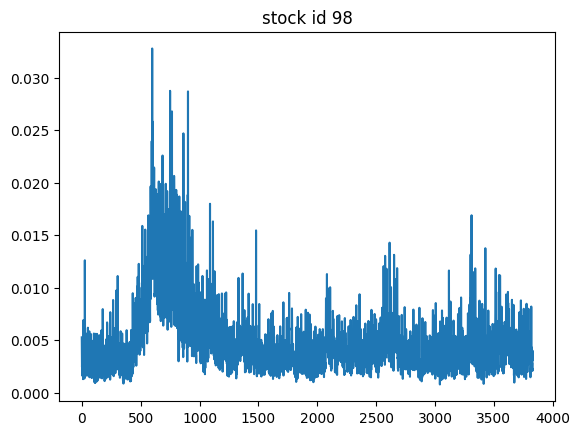

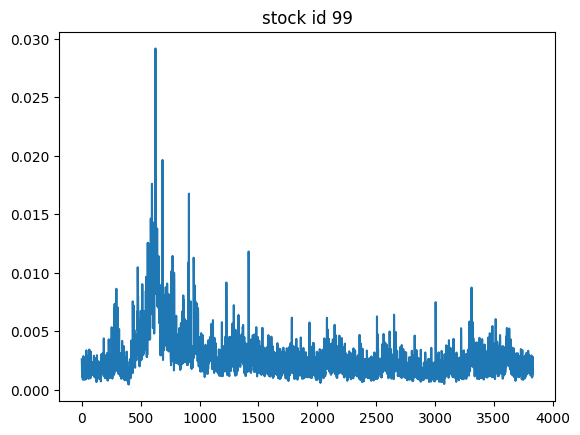

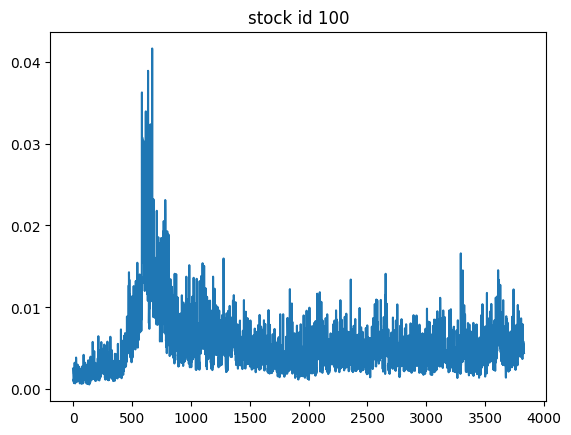

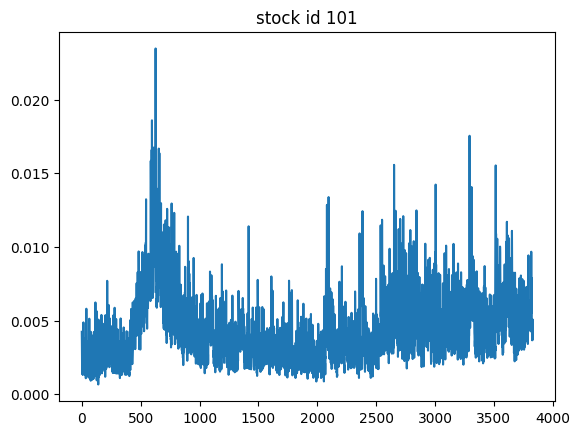

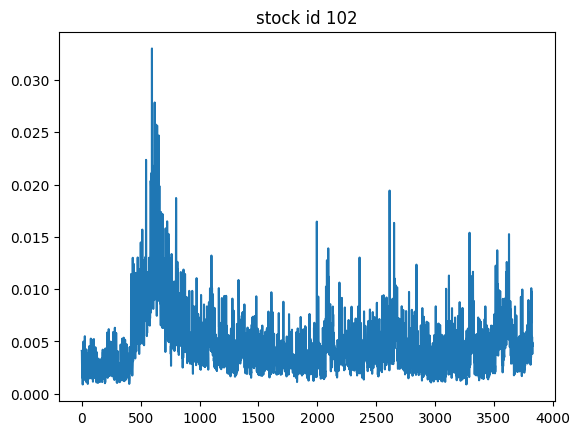

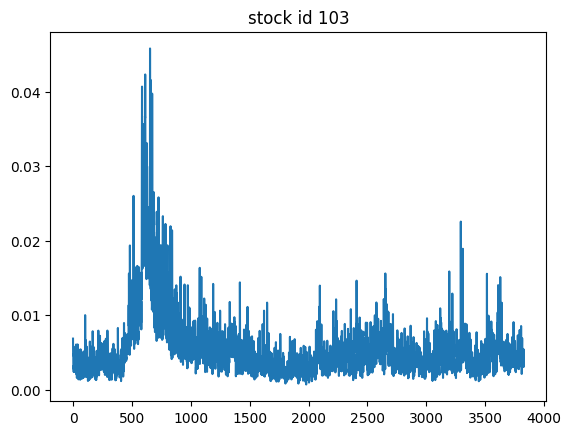

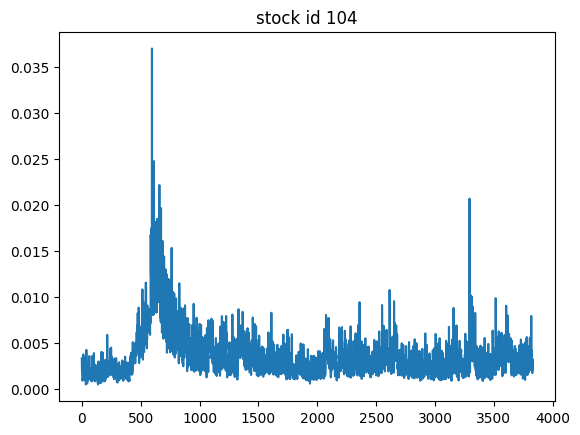

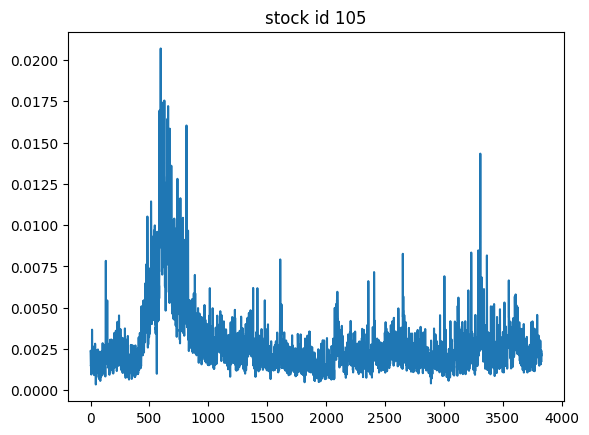

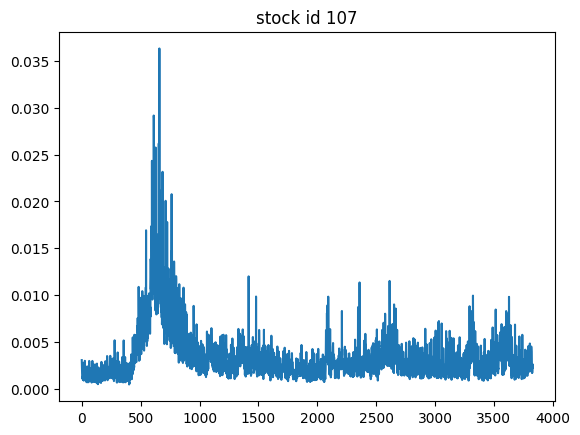

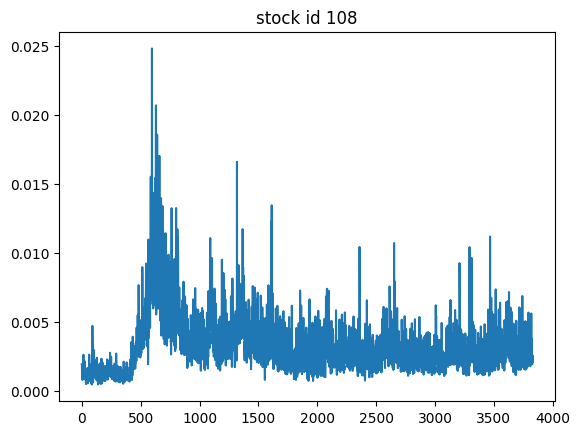

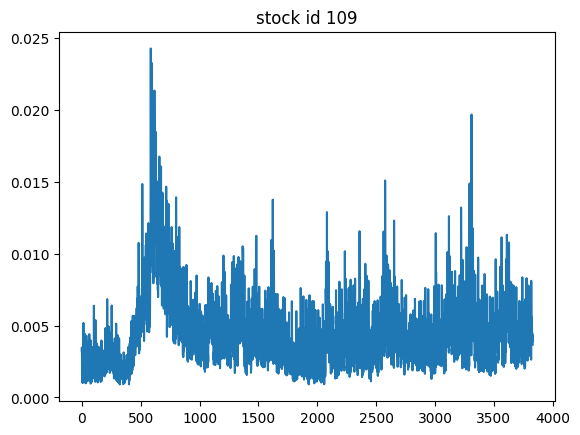

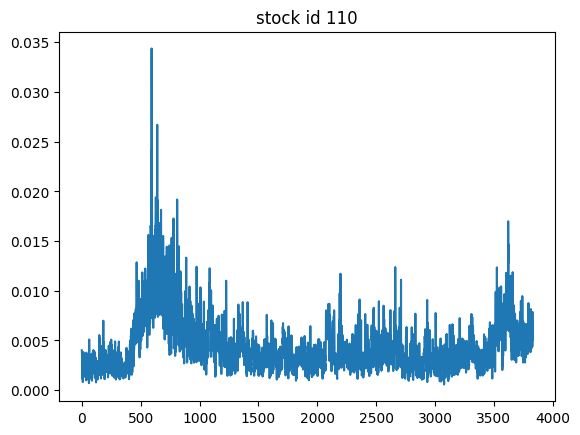

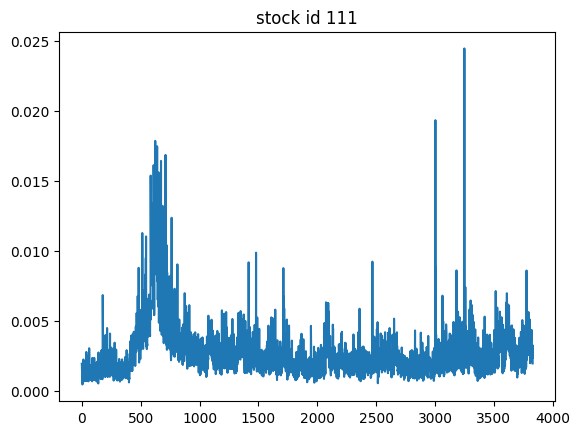

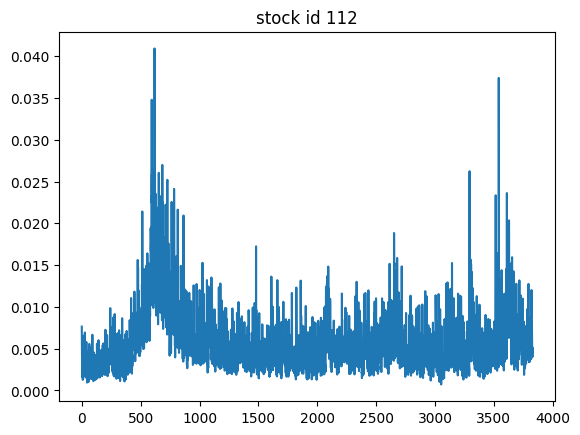

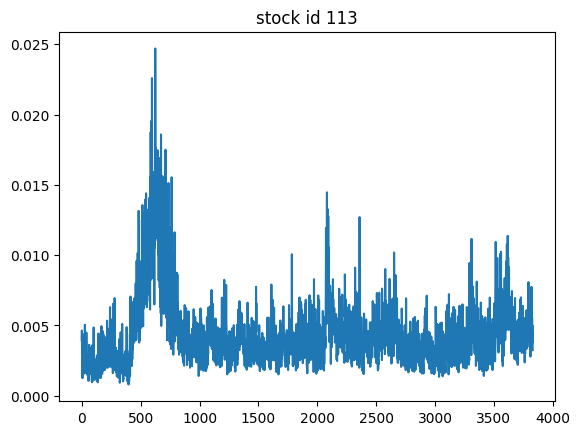

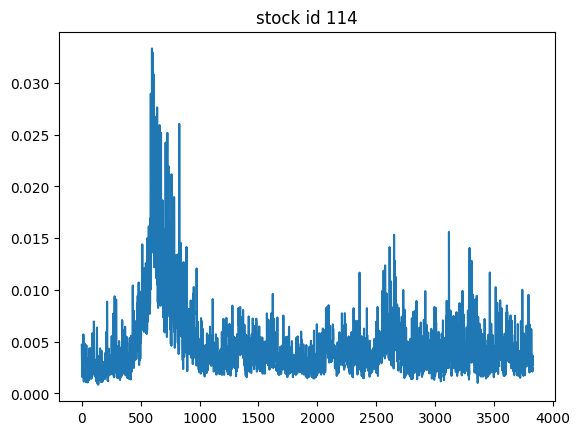

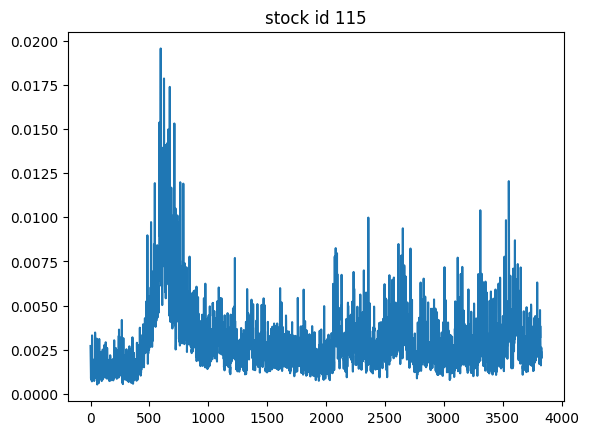

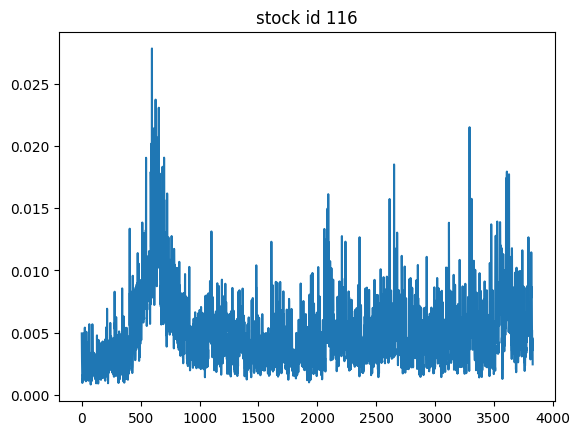

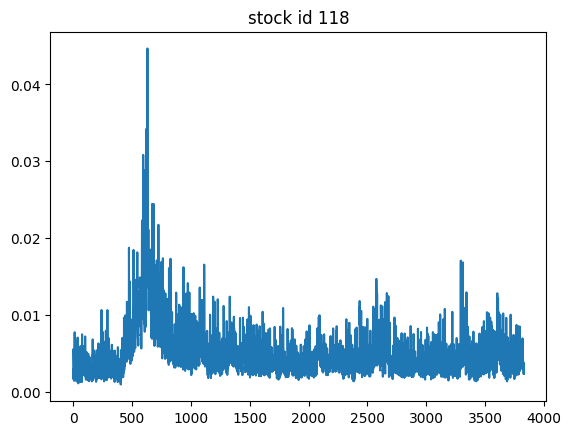

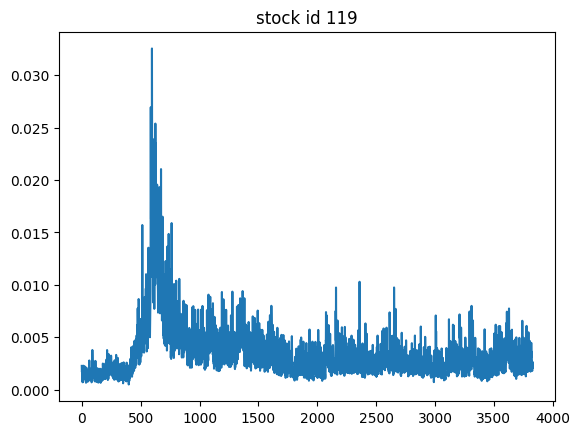

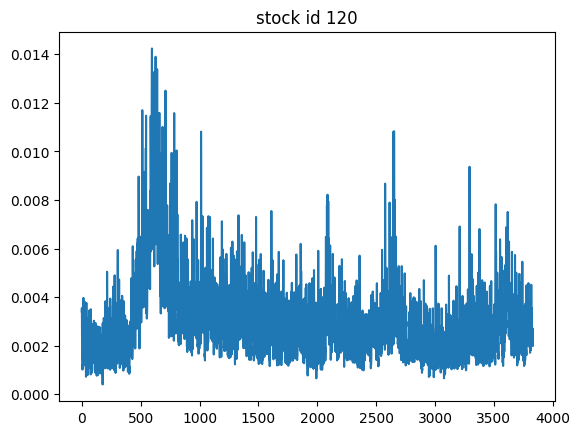

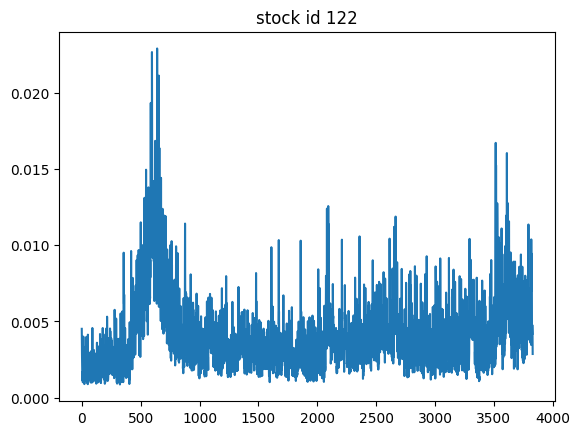

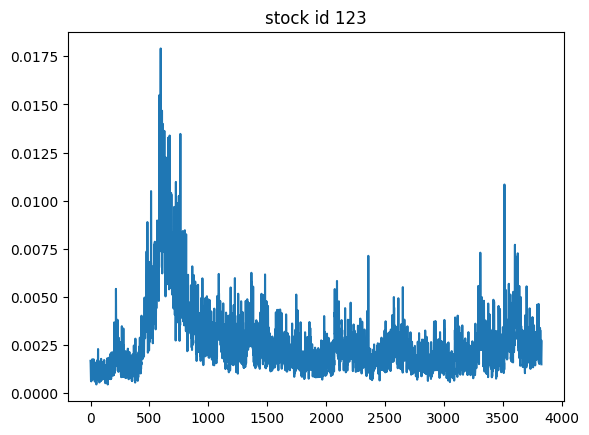

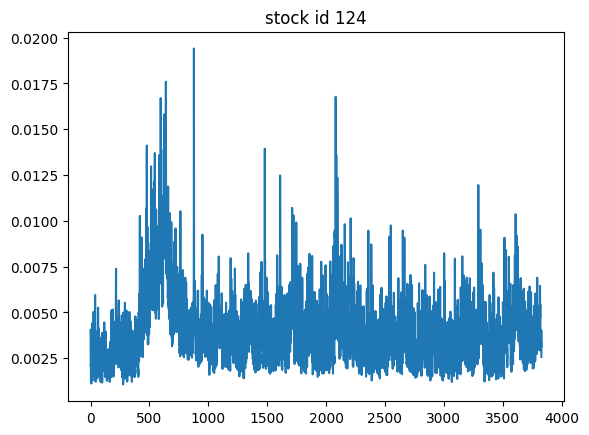

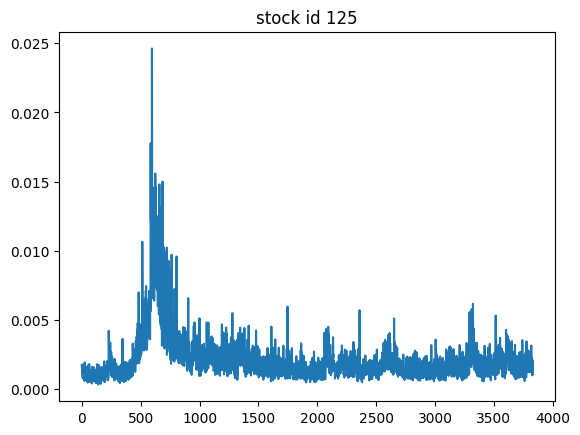

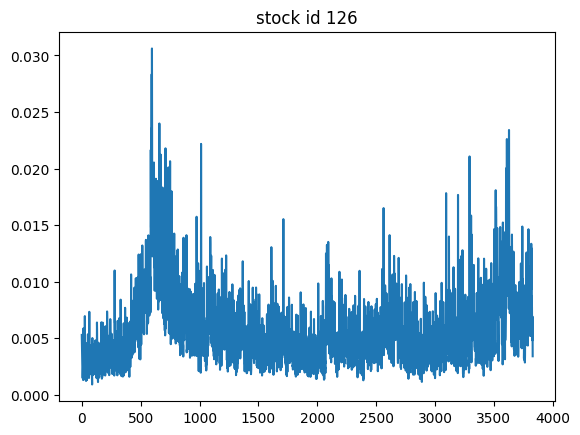

In [44]:
# individual plot of all the stocks
import matplotlib.pyplot as plt

for stock_id in sorted(stock_ids):
    stock_data = df[df['stock_id'] == stock_id].reset_index(drop=True)
    plt.plot(stock_data['target'])
    plt.title(f'stock id {stock_id}')
    plt.show()



In [46]:
import matplotlib.pyplot as plt
def plot_graphs(x,y,stock_ids_plot):
    fig, axs = plt.subplots(x, y, sharex=True)

    i = 0
    for xi in range(x):
        for yi in range(y):
            stock_id = stock_ids_plot[i]
            stock_data = df[df['stock_id'] == stock_id].reset_index(drop=True)
            axs[xi, yi].plot(stock_data['target'])
            axs[xi, yi].set_title(f'Stock data for {stock_id}')
            i += 1

    for ax in axs.flat:
        ax.set(xlabel='Time Id', ylabel='RV')

    # Hide x-labels and tick labels for top plots and y ticks for right plots
    for ax in axs.flat:
        ax.label_outer()

    plt.show()

In [ ]:
x, y = 2,2
similar_stock_ids = []
plot_graphs(x, y, similar_stock_ids)